In [80]:
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
import talib as ta


In [82]:
df = pd.read_csv('../data/stock_price_data.csv')

In [83]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,stock
3291627,2020-04-23,12.89,13.39,12.82,13.01,12.252601,66100.0,IBCP
3291628,2020-04-24,13.06,13.48,12.96,13.37,12.591642,42200.0,IBCP
3291629,2020-04-27,13.57,14.77,13.55,14.62,13.768871,120600.0,IBCP
3291630,2020-04-28,14.93,15.39,14.53,15.10,14.220928,91000.0,IBCP
3291631,2020-04-29,15.64,16.50,15.33,16.25,15.303979,121800.0,IBCP


In [84]:
def calculate_incdicators(df):
  # Calculate the moving average of the closing prices
  df['ma5'] = ta.MA(df['Close'], timeperiod=5)
  df['ma10'] = ta.MA(df['Close'], timeperiod=10)

  # Calculate the relative strength index (RSI)
  df['rsi'] = ta.RSI(df['Close'], timeperiod=14)

  # Calculate the moving average convergence divergence (MACD)
  df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

  return df

In [85]:
# choosing the data of specific stock
stock_df = df[df['stock'] == 'AA']
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,stock
2796,2009-08-10,30.950640,31.383181,30.205709,30.494070,27.451963,12441906.0,AA
2797,2009-08-11,30.301830,30.782431,29.845261,30.542130,27.495226,13131169.0,AA
2798,2009-08-12,30.085560,31.551390,29.917351,31.142879,28.036053,14552643.0,AA
2799,2009-08-13,31.983931,33.041248,31.527361,32.945129,29.658504,15589263.0,AA
2800,2009-08-14,33.161400,33.353642,31.503330,31.887810,28.706663,14639409.0,AA


In [ ]:
indicator_df = calculate_incdicators(stock_df)

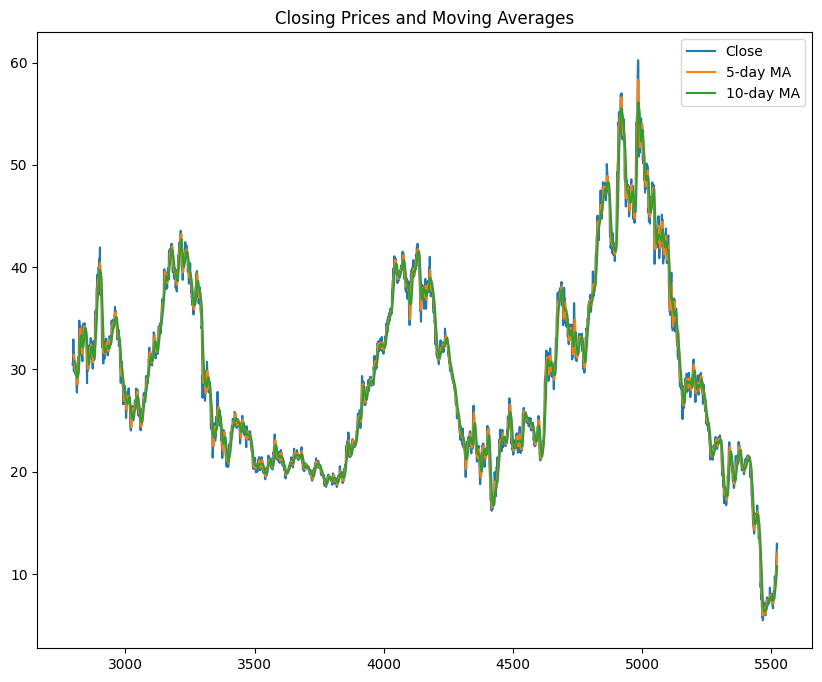

In [87]:

# Plot the closing prices and moving averages
plt.figure(figsize=(10, 8))
plt.title('Closing Prices and Moving Averages')
plt.plot(indicator_df['Close'], label='Close')
plt.plot(indicator_df['ma5'], label='5-day MA')
plt.plot(indicator_df['ma10'], label='10-day MA')
plt.legend()
plt.show()


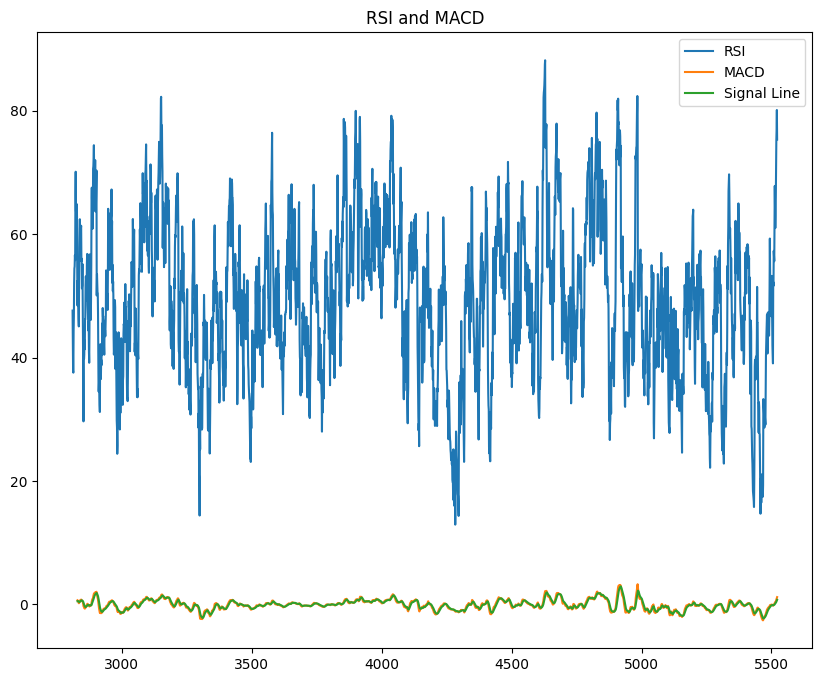

In [88]:
# Plot RSI and MACD
plt.figure(figsize=(10, 8))
plt.title('RSI and MACD')
plt.plot(indicator_df['rsi'], label='RSI')
plt.plot(indicator_df['macd'], label='MACD')
plt.plot(indicator_df['macdsignal'], label='Signal Line')
plt.legend()
plt.show()